In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

2025-03-07 12:44:10.056530: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-07 12:44:10.188664: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-07 12:44:10.193810: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-03-07 12:44:10.193828: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [3]:
mnist = tf.keras.datasets.mnist
(train_img, train_label), (test_img, test_label) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


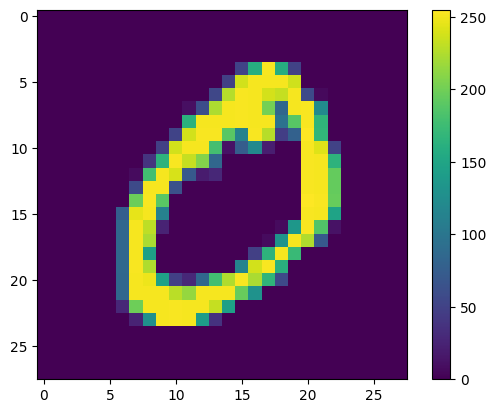

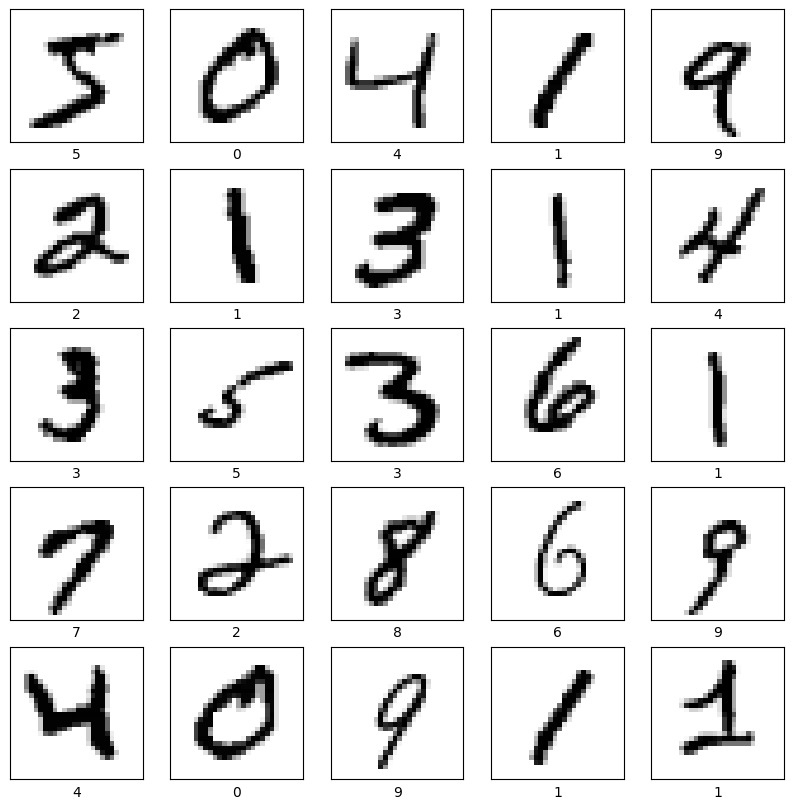

In [6]:
plt.figure()
plt.imshow(train_img[1])
plt.colorbar()
plt.grid(False)
plt.show()

train_img = train_img / 255.0
test_img = test_img / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i], cmap=plt.cm.binary)
    plt.xlabel(train_label[i])
plt.show()

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_img, train_label, epochs=5)
model.evaluate(test_img, test_label, verbose=2)

2025-03-07 12:48:32.593410: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-03-07 12:48:32.593452: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (piai-Precision-7920-Tower): /proc/driver/nvidia/version does not exist
2025-03-07 12:48:32.593881: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3047 - accuracy: 0.9104
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1439 - accuracy: 0.9568
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1084 - accuracy: 0.9668
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0883 - accuracy: 0.9726
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0760 - accuracy: 0.9762
313/313 - 1s - loss: 0.0775 - accuracy: 0.9773 - 764ms/epoch - 2ms/step


[0.07748661935329437, 0.9772999882698059]

In [9]:
predictions = model.predict(test_img)
predictions[0]
np.argmax(predictions[0])

313/313 [==============================] - 1s 2ms/step


7

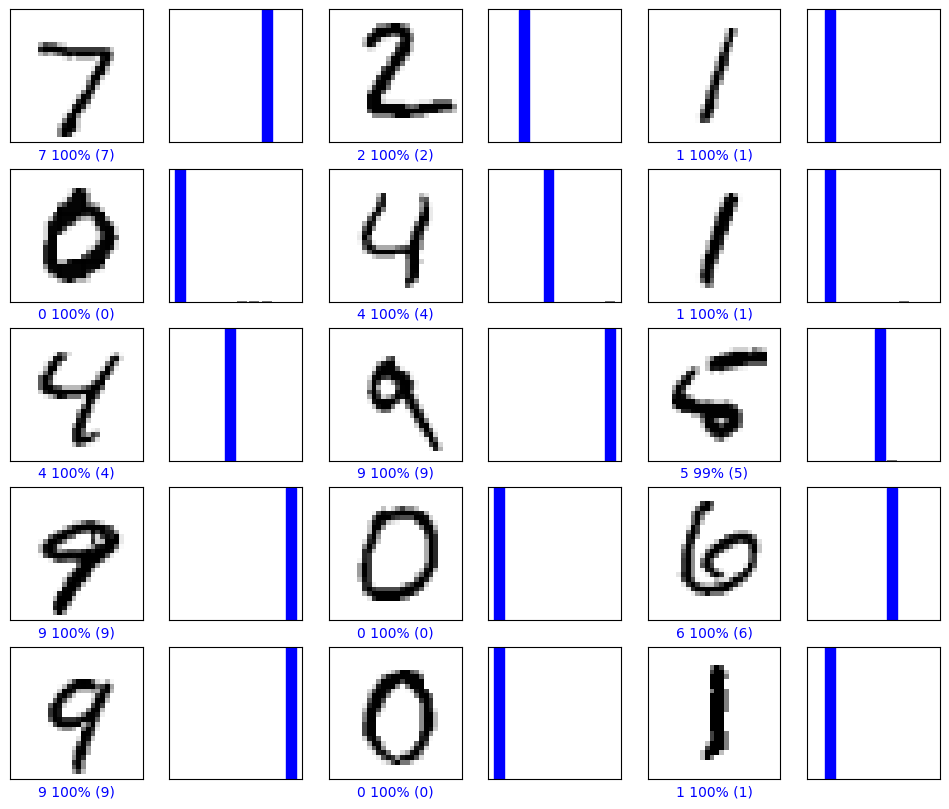

In [11]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                            100*np.max(predictions_array),
                                            true_label),
                                            color=color)
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_label, test_img)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_label)
plt.show()